# 5. 인공신경망
## 5.1 다층 퍼셉트론
### 5.1.1 선형 회귀

In [2]:
import torch
import torch.nn as nn
from matplotlib import pyplot as plt

In [3]:
x = torch.FloatTensor(range(5)).unsqueeze(1)
y = 2*x + torch.rand(5,1)

In [4]:
class LinearRegressor(nn.Module):
    def __init__(self):
        super().__init__() # 모델 연산 정의
        self.fc = nn.Linear(1, 1, bias=True)
    
    def forward(self, x): 
        y = self.fc(x)
      
        return y  

In [5]:
model = LinearRegressor()

In [6]:
learning_rate = 1e-3
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [7]:
loss_stack = []
for epoch in range(1001):
    
    optimizer.zero_grad()
    
    y_hat = model(x)
    loss = criterion(y_hat,y)
    
    loss.backward()
    optimizer.step() 
    loss_stack.append(loss.item())
    
    if epoch % 100 == 0:
        print(f'Epoch {epoch}:{loss.item()}')

Epoch 0:12.153472900390625
Epoch 100:0.9730347394943237
Epoch 200:0.20884695649147034
Epoch 300:0.14689679443836212
Epoch 400:0.13338539004325867
Epoch 500:0.1241849884390831
Epoch 600:0.11620799452066422
Epoch 700:0.10914137214422226
Epoch 800:0.10287101566791534
Epoch 900:0.09730657190084457
Epoch 1000:0.09236830472946167


In [8]:
with torch.no_grad():
    y_hat = model(x)

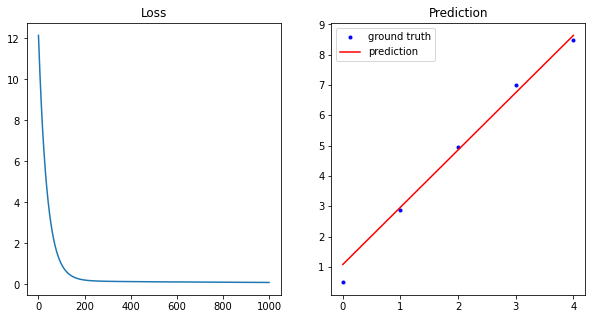

In [9]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.plot(loss_stack)
plt.title("Loss")
plt.subplot(122)
plt.plot(x, y,'.b')
plt.plot(x, y_hat, 'r-')
plt.legend(['ground truth','prediction'])
plt.title("Prediction")
plt.show()